In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Statistics with Python/Regression Analysis/Cox Proportional Hazard Regression

/content/drive/MyDrive/Statistics with Python/Regression Analysis/Cox Proportional Hazard Regression


In [ ]:
 #Library
 !pip install lifelines

In [ ]:
#libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from lifelines.statistics import logrank_test
from lifelines import KaplanMeierFitter, CoxPHFitter

In [ ]:
#Load the data

df = pd.read_csv('lung.csv')
df.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


#Kaplan Meier Estimator

In [ ]:
#transform the dependent variable, the status is censoring status 1=censored, 2=dead and I wil transform it to censoring status 0=censored, 1=dead

# Ensure 'status' is of integer type before replacement
df['status'] = df['status'].astype(int)

# Transform the 'status' column using replace
df['status'] = df['status'].replace({1: 0, 2: 1})


# Display the transformed DataFrame
df.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,3.0,306,1,74,1,1.0,90.0,100.0,1175.0,NaN
1,3.0,455,1,68,1,0.0,90.0,90.0,1225.0,15.0
2,3.0,1010,0,56,1,0.0,90.0,90.0,NaN,15.0
3,5.0,210,1,57,1,1.0,90.0,60.0,1150.0,11.0
4,1.0,883,1,60,1,0.0,100.0,90.0,NaN,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   inst       227 non-null    float64
 1   time       228 non-null    int64  
 2   status     228 non-null    int64  
 3   age        228 non-null    int64  
 4   sex        228 non-null    int64  
 5   ph.ecog    227 non-null    float64
 6   ph.karno   227 non-null    float64
 7   pat.karno  225 non-null    float64
 8   meal.cal   181 non-null    float64
 9   wt.loss    214 non-null    float64
dtypes: float64(6), int64(4)
memory usage: 17.9 KB


In [ ]:
#KME (the time is the independent variable and the status is the dependable one)

model = KaplanMeierFitter()
model.fit(durations = df.time, event_observed = df.status)
model.event_table.head()

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,228,228
5.0,1,1,0,0,228
11.0,3,3,0,0,227
12.0,1,1,0,0,224
13.0,2,2,0,0,223


In [ ]:
#Look at the data frame from KME
model.event_table.tail()

,removed,observed,censored,entrance,at_risk
event_at,,,,,
840.0,1,0,1,0,5
883.0,1,1,0,0,4
965.0,1,0,1,0,3
1010.0,1,0,1,0,2
1022.0,1,0,1,0,1


In [ ]:
#Calculate the survival probabilities
specific_times = [30,90,180,360,720,1080]
model.predict(specific_times)

,KM_estimate
30,0.956140
90,0.881579
180,0.721671
360,0.434044
720,0.124593
1080,0.050346


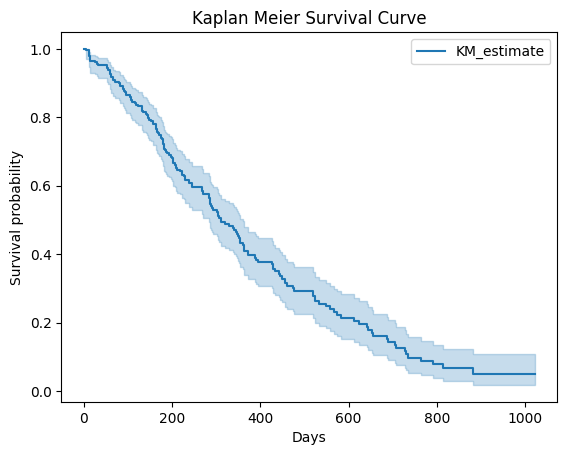

In [ ]:
#Visualization survival curve
model.plot()
plt.title('Kaplan Meier Survival Curve')
plt.xlabel('Days')
plt.ylabel('Survival probability')
plt.show()

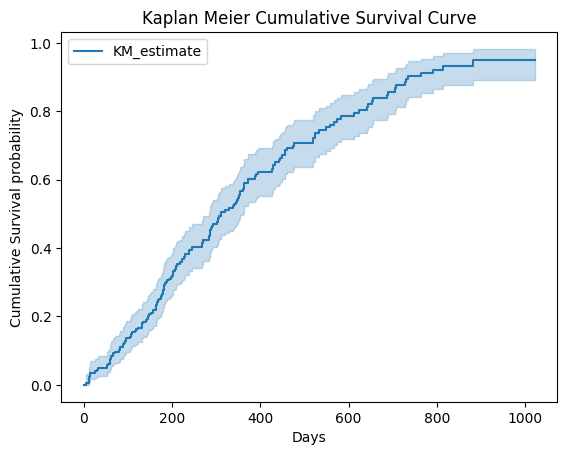

In [ ]:
#Visualization Cumulative survival curve
model.plot_cumulative_density()
plt.title('Kaplan Meier Cumulative Survival Curve')
plt.xlabel('Days')
plt.ylabel('Cumulative Survival probability')
plt.show()

In [ ]:
#Female vs Males Survival curve

#Split betwwe males and females

male = df.query('sex == 1')
female = df.query('sex == 2')
male.head()


,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,3.0,306,1,74,1,1.0,90.0,100.0,1175.0,NaN
1,3.0,455,1,68,1,0.0,90.0,90.0,1225.0,15.0
2,3.0,1010,0,56,1,0.0,90.0,90.0,NaN,15.0
3,5.0,210,1,57,1,1.0,90.0,60.0,1150.0,11.0
4,1.0,883,1,60,1,0.0,100.0,90.0,NaN,0.0


In [ ]:
#KME male
model_male = KaplanMeierFitter()
model_male.fit(durations = male.time, event_observed = male.status)

#KME female
model_female = KaplanMeierFitter()
model_female.fit(durations = female.time, event_observed = female.status)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 90 total observations, 37 right-censored observations>

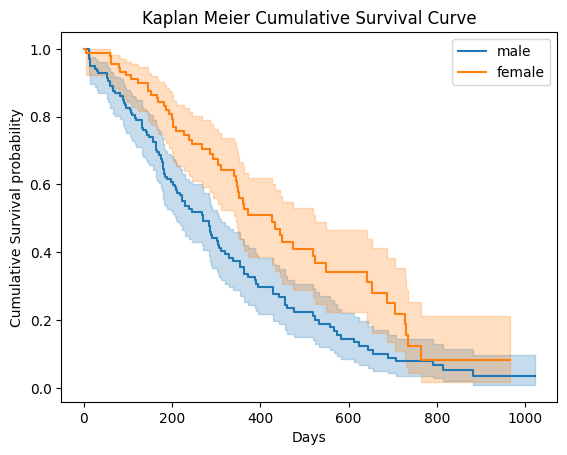

In [ ]:
#plot the survival curve
model_male.plot(label = 'male')
model_female.plot(label = 'female')
plt.title('Kaplan Meier Cumulative Survival Curve')
plt.xlabel('Days')
plt.ylabel('Cumulative Survival probability')
plt.show()

In [ ]:
# Is this statistically sisgnificant

In [ ]:
#Null hypotesis: (status quo) the is no deference between male and female curves
#Alternative Hypotesis: There is a diference betwwen the curves

In [ ]:
#log rank test
Result = logrank_test(durations_A=male.time,
             durations_B=female.time,
             event_observed_A=male.status,
             event_observed_B=female.status)

In [ ]:
Result.p_value

0.0013111645203554782

In [ ]:
# Create a function to read the p-value
def p_value_reader(p_value, alpha):
  if p_value < alpha:
    print("Reject the Null Hypothesis")
  else:
    print("Fail to reject the Null Hypothesis")

In [ ]:
p_value_reader(Result.p_value, 0.05)

Reject the Null Hypothesis


#Preparing data frame for CPH regression

In [ ]:
#handle missing data
df = df.dropna()
df.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
1,3.0,455,1,68,1,0.0,90.0,90.0,1225.0,15.0
3,5.0,210,1,57,1,1.0,90.0,60.0,1150.0,11.0
5,12.0,1022,0,74,1,1.0,50.0,80.0,513.0,0.0
6,7.0,310,1,68,2,2.0,70.0,60.0,384.0,10.0
7,11.0,361,1,71,2,2.0,60.0,80.0,538.0,1.0


In [ ]:
#Remove non drivers variables

df = df.drop(columns = ['inst'])
df.head()

,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
1,455,1,68,1,0.0,90.0,90.0,1225.0,15.0
3,210,1,57,1,1.0,90.0,60.0,1150.0,11.0
5,1022,0,74,1,1.0,50.0,80.0,513.0,0.0
6,310,1,68,2,2.0,70.0,60.0,384.0,10.0
7,361,1,71,2,2.0,60.0,80.0,538.0,1.0


In [ ]:
#training test split

train_df, val_df = train_test_split(df, test_size= 0.2, random_state= 1502)

In [ ]:
#check the column
df.head(0)

,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss


#CPH model

In [ ]:
model = CoxPHFitter()
model.fit(train_df, duration_col = 'time', event_col = 'status')
model.print_summary()

<lifelines.CoxPHFitter: fitted with 133 total observations, 39 right-censored observations>
             duration col = 'time'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 133
number of events observed = 94
   partial log-likelihood = -363.82
         time fit was run = 2024-10-02 20:08:26 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
age        0.01      1.01      0.01           -0.01            0.04                0.99                1.04
sex       -0.50      0.61      0.23           -0.95           -0.05                0.39                0.95
ph.ecog    0.63      1.88      0.27            0.11            1.15                1.12                3.17
ph.karno   0.02      1.02      0.01           -0.00            0.05                1.00                1.05
pat.karno -0.02      0.98      0.01           -0.03            0.00                0.97                1.00
meal.cal   0.00      1.00      0.00           -0.00            0.00                1.00                1.00
wt.loss   -0.02      0.98      0.01           -0.04           -0.00                0.96                1.00

           cmp to     z    p  -log2(p)
covariate                             
age          0.00  0.91 0.36      1.47
sex          0.00 -2.17 0.03      5.07
ph.ecog      0.00  2.38 0.02      5.85
ph.karno     0.00  1.90 0.06      4.13
pat.karno    0.00 -1.91 0.06      4.15
meal.cal     0.00  0.42 0.67      0.57
wt.loss      0.00 -2.07 0.04      4.71
---
Concordance = 0.65
Partial AIC = 741.64
log-likelihood ratio test = 20.74 on 7 df
-log2(p) of ll-ratio test = 7.90

In [ ]:
#create a function to interpret

def interpret_coxph_lifelines(model):
    """
    Interprets the coefficients of a Cox Proportional Hazards model fitted using lifelines.
    Provides an interpretation for each coefficient and checks for statistical significance.

    Parameters:
    model : lifelines.CoxPHFitter
        The fitted Cox Proportional Hazards model.
    """

    # Get the coefficients and p-values
    summary = model.summary
    variables = summary.index
    params = summary['coef']
    pvalues = summary['p']

    for variable, coef, pvalue in zip(variables, params, pvalues):
        print('-' * 50)

        # Interpret coefficient
        print(f"For the variable '{variable}':")
        print(f"  - A unit increase in this variable alters the hazard by a factor of {np.exp(coef):.2f}.")

        # Check for statistical significance
        if pvalue < 0.05:
            print("  - This variable is statistically significant at the 0.05 level.")
        else:
            print("  - This variable is not statistically significant at the 0.05 level.")

    print('-' * 50)

In [ ]:
#apply the function

interpret_coxph_lifelines(model)

--------------------------------------------------
For the variable 'age':
  - A unit increase in this variable alters the hazard by a factor of 1.01.
  - This variable is not statistically significant at the 0.05 level.
--------------------------------------------------
For the variable 'sex':
  - A unit increase in this variable alters the hazard by a factor of 0.61.
  - This variable is statistically significant at the 0.05 level.
--------------------------------------------------
For the variable 'ph.ecog':
  - A unit increase in this variable alters the hazard by a factor of 1.88.
  - This variable is statistically significant at the 0.05 level.
--------------------------------------------------
For the variable 'ph.karno':
  - A unit increase in this variable alters the hazard by a factor of 1.02.
  - This variable is not statistically significant at the 0.05 level.
--------------------------------------------------
For the variable 'pat.karno':
  - A unit increase in this variab

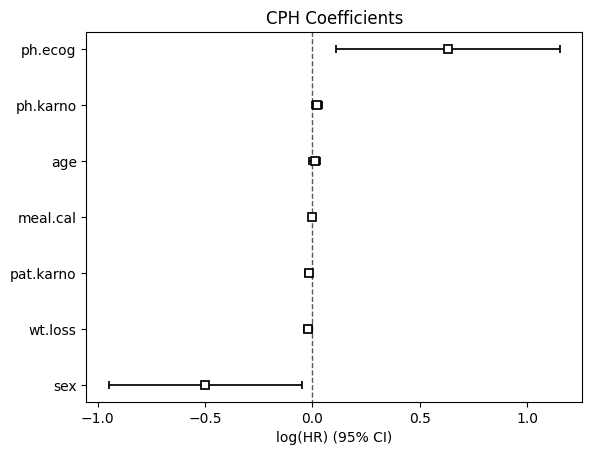

In [ ]:
#visualizing the coefficient
model.plot()
plt.title('CPH Coefficients')
plt.show()

In [ ]:
#Assess the Cox Models

# Isolate and prepare the validation data
val_time = val_df['time']
val_status = val_df['status']
val_X = val_df.drop(columns = ['time', 'status'])

In [ ]:
# Calculate the predicted hazards
predicted_hazard = model.predict_partial_hazard(val_X)
predicted_hazard

,0
25,1.013067
60,1.391381
164,1.140806
130,0.292247
72,1.758628
100,0.343233
6,1.450128
172,1.074406
67,0.648968
190,0.936466


In [ ]:
from lifelines.utils import concordance_index

# Assuming val_time, predicted_hazard, and val_status are defined elsewhere in your code
concordance_index_value = concordance_index(val_time,
                                            -predicted_hazard,
                                            val_status)
print(f"The C-index is {concordance_index_value}")

The C-index is 0.6437768240343348


In [ ]:
#uggestion: Try a more advanced Machine Learning model like XGBoost -> if focus is on accuracy

In [ ]:
#Predict specific instances

instance = val_X.iloc[0]
predict_survival = model.predict_survival_function(instance)

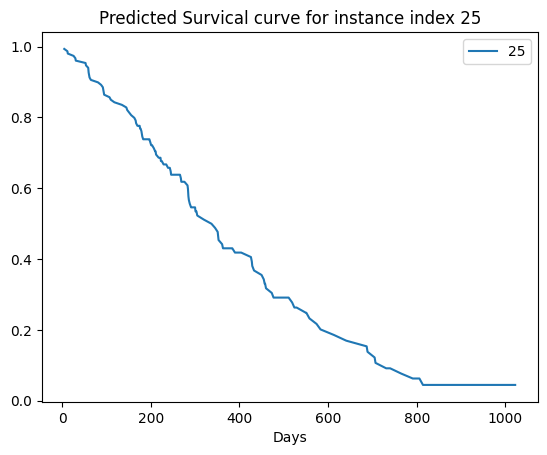

In [ ]:
# Plot the function
predict_survival.plot()
plt.title("Predicted Survical curve for instance index 25")
plt.xlabel("Days")
plt.show()

###Key Findings and Conclusions
Survival Analysis with Kaplan-Meier:

The Kaplan-Meier curves provide visual insights into the survival probabilities over time, allowing for comparisons between different groups (e.g., males vs. females).
The log-rank test indicates whether there is a statistically significant difference in survival curves between groups. If the p-value is less than 0.05, the null hypothesis (no difference) is rejected, suggesting that gender may impact survival rates.
Cox Proportional Hazards Model:

The CPH model identifies variables that significantly affect the hazard (risk of death) for patients. Each coefficient indicates the hazard ratio for a one-unit increase in the corresponding variable.
Variables with p-values less than 0.05 are considered statistically significant, meaning they have a meaningful impact on survival.
Concordance Index:

The concordance index (C-index) quantifies the model's predictive accuracy. A C-index close to 1 indicates good model performance, while a value around 0.5 suggests the model is no better than random guessing.
Predicted Survival Functions:

The model can predict survival functions for individual patients, allowing for personalized insights into expected survival times based on their characteristics.
Overall Conclusion
The project successfully employs survival analysis techniques to understand and predict survival outcomes for lung cancer patients. The findings can inform clinical decision-making and highlight important factors that influence patient survival, providing valuable insights for healthcare professionals. Further enhancement of the model with advanced machine learning techniques could improve accuracy and predictive power.